Standard Deviation of Value Creation (in billions): 8.133136697911187
Mean of Value Creation (in billions): 2.921073446327684
Median of Value Creation (in billions): 1.524


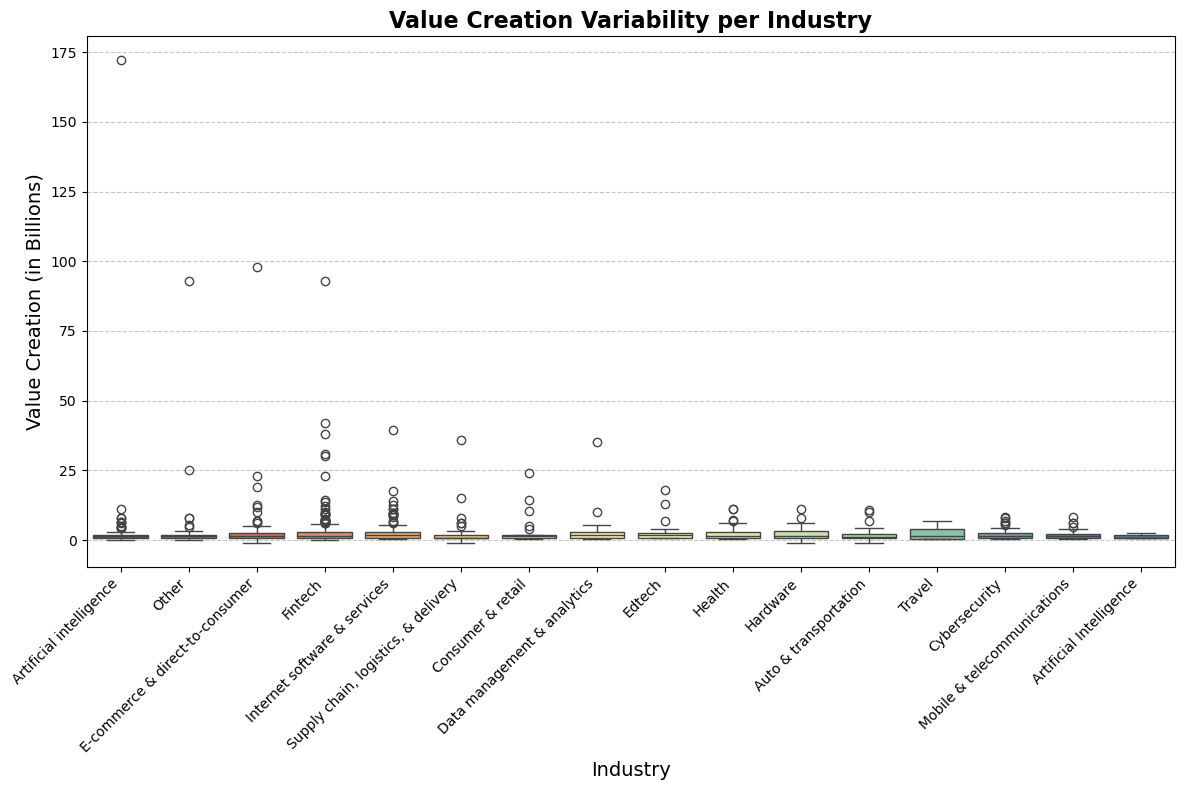

Plot saved to: C:/Users/chris/Downloads/IDS706/chris_moriera_valuecreation_pandas/value_creation_boxplot.png


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


def dataset_import(file_path=None):
    if file_path is None:
        # Use a relative path to the test_data folder
        base_path = os.getcwd()  # Get current working directory
        file_path = os.path.join(base_path, "test_data", "unicorn_companies.csv")

    df_raw = pd.read_csv(file_path)
    return df_raw


def data_modeling(df_raw):
    df_edited = df_raw.dropna(subset=["Valuation", "Funding"])
    df_edited["Funding"] = df_edited["Funding"].astype(
        str
    )  # Ensure Funding is treated as a string
    df_edited = df_edited[~df_edited["Funding"].str.contains("n")].copy()

    # Clean up the dollar sign and extract unit
    df_edited["Funding_clean"] = (
        df_edited["Funding"].str.replace(r"[$,]", "", regex=True).str.strip()
    )
    df_edited["Valuation_clean"] = (
        df_edited["Valuation"].str.replace(r"[$,]", "", regex=True).str.strip()
    )

    df_edited["funding_unit"] = (
        df_edited["Funding_clean"].str[-1].fillna("").str.upper()
    )
    df_edited["valuation_unit"] = (
        df_edited["Valuation_clean"].str[-1].fillna("").str.upper()
    )

    df_edited["funding_value"] = pd.to_numeric(
        df_edited["Funding_clean"].str[:-1], errors="coerce"
    )
    df_edited["valuation_value"] = pd.to_numeric(
        df_edited["Valuation_clean"].str[:-1], errors="coerce"
    )

    df_edited["funding_value"] = np.where(
        df_edited["funding_unit"] == "B",
        df_edited["funding_value"] * 1e9,
        df_edited["funding_value"] * 1e6,
    )
    df_edited["valuation_value"] = np.where(
        df_edited["valuation_unit"] == "B",
        df_edited["valuation_value"] * 1e9,
        df_edited["valuation_value"] * 1e6,
    )

    # Compute value creation and divide by 1e9 to convert to billions
    df_edited["value_creation"] = (
        df_edited["valuation_value"] - df_edited["funding_value"]
    ) / 1e9

    return df_edited


# Mean function
def calculate_mean(df_edited):
    return df_edited["value_creation"].mean()


# Median function
def calculate_median_value_creation(df_edited):
    return df_edited["value_creation"].median()


# Standard deviation function
def calculate_std_value_creation(df_edited):
    return df_edited["value_creation"].std()


def plot_value_creation_by_industry(df_edited, save_dir):
    plt.figure(figsize=(12, 8))

    # Create a vibrant custom color palette
    unique_industries = df_edited["Industry"].nunique()
    custom_palette = sns.color_palette("Spectral", unique_industries)

    # Create the boxplot with 'Industry' assigned to hue
    sns.boxplot(
        x="Industry",
        y="value_creation",
        data=df_edited,
        palette=custom_palette,
        hue="Industry",
    )

    # Set title and labels
    plt.title("Value Creation Variability per Industry", fontsize=16, fontweight="bold")
    plt.xlabel("Industry", fontsize=14)
    plt.ylabel("Value Creation (in Billions)", fontsize=14)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Add a grid for better visualization
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()

    # Ensure the directory exists, and save the plot
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    plot_path = os.path.join(save_dir, "value_creation_boxplot.png")
    plt.savefig(plot_path)
    plt.show()

    print(f"Plot saved to: {plot_path}")


# Call the functions to load and process the data
df_raw_o = dataset_import()
df_edited_o = data_modeling(df_raw_o)

# Calculate and print statistics
std_value_creation = calculate_std_value_creation(df_edited_o)
print("Standard Deviation of Value Creation (in billions):", std_value_creation)

mean_value_creation = calculate_mean(df_edited_o)
print("Mean of Value Creation (in billions):", mean_value_creation)

median_value_creation = calculate_median_value_creation(df_edited_o)
print("Median of Value Creation (in billions):", median_value_creation)

save_directory = r"C:/Users/chris/Downloads/IDS706/chris_moriera_valuecreation_pandas/"
plot_value_creation_by_industry(df_edited_o, save_directory)